# Imports

In [8]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn import tree
import sklearn.cluster as cluster
from sklearn.metrics import accuracy_score
import plotly.express as px
import plotly.graph_objects as go
from scipy.optimize import minimize

np.random.seed(1234)

In [9]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
plt.rcParams.update({"axes.grid": True, "figure.figsize": (8, 4)})
import seaborn as sns

# sns.set()

# 15.1 Minimize an Arbitrary Function with Guess and Check

Define an arbitrary 4th order function with 2 local minima

In [10]:
def arbitrary(x):
    return (x**4 - 15 * x**3 + 80 * x**2 - 180 * x + 144) / 10.0


x = np.linspace(1, 6.75, 200)
px.line(y=arbitrary(x), x=x)

Notice that scipy minimize is affected by choice of initial guess
- Compare answer for x when guesing x0=6 vs. x0=1

In [11]:
minimize(arbitrary, x0=1)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.13827491294422317
        x: [ 2.393e+00]
      nit: 7
      jac: [-3.800e-07]
 hess_inv: [[ 7.475e-01]]
     nfev: 16
     njev: 8

In [12]:
minimize(arbitrary, x0=6)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.6914096788314851
        x: [ 5.326e+00]
      nit: 6
      jac: [ 9.157e-06]
 hess_inv: [[ 4.797e-01]]
     nfev: 14
     njev: 7

One approach - guess and check
- Terrible approach!
- Just try different values of x and see what happens

Another approach - use brute force search to try out a bunch of x values and choose the minimizer

In [13]:
def simple_minimize(fun, x):
    return x[np.argmin(fun(x))]


xs = np.linspace(1, 7, 20)
simple_minimize(arbitrary, xs)

5.421052631578947

In [14]:
fig = px.line(y=arbitrary(x), x=x)
fig.add_scatter(x=xs, y=arbitrary(xs), mode="markers")
fig.show()

This approach has 3 big problems:
- Range: what if actual minimizer is outside of the range you tried
- Resolution: the range may capture the minimizer, but the step size could be too coarse
- Inefficiency: expensive to compute all these f(x)

## 



# 15.2 Visualizing the Derivative

Minima of the functions occur at zero-crossings of the derivative

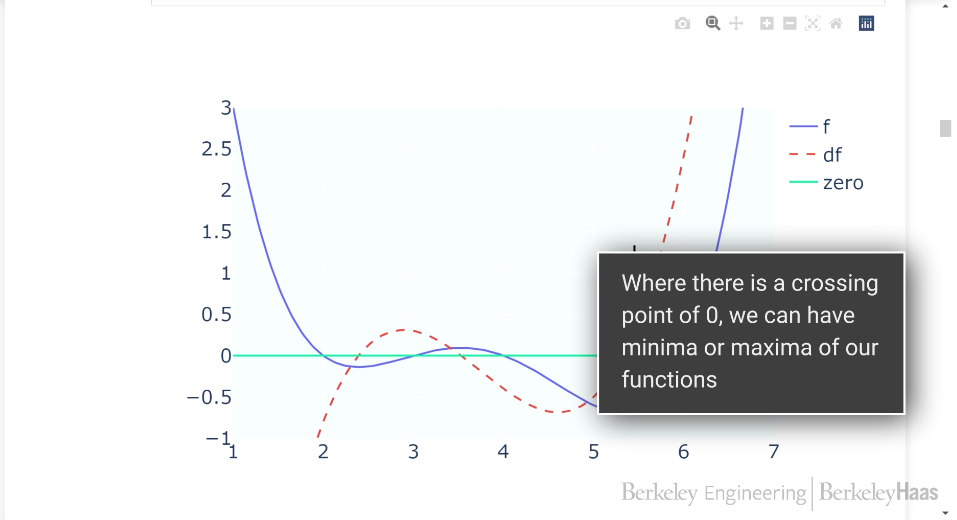

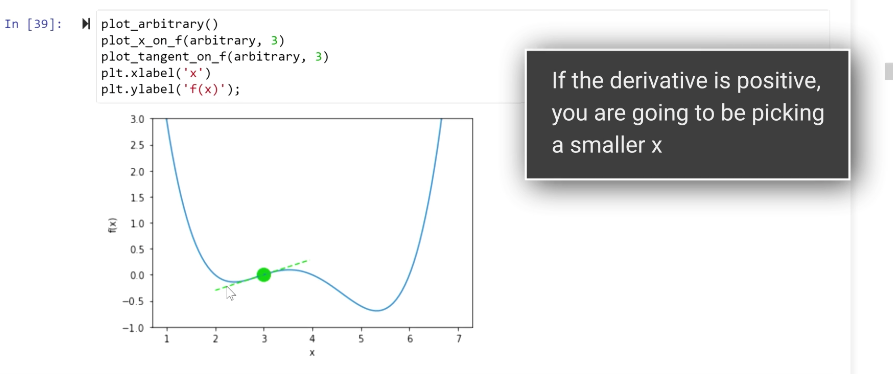

In [16]:
def derivative_arbitrary(x):
    return (4 * x**3 - 45 * x**2 + 160 * x - 180) / 10.0


def line(x):
    return 0 * x

In [27]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=arbitrary(x), mode="lines", name="f"))
fig.add_trace(
    go.Scatter(
        x=x, y=derivative_arbitrary(x), mode="lines", name="df", line={"dash": "dash"}
    )
)
fig.add_trace(go.Scatter(x=x, y=line(x), mode="lines", name="zero"))
fig.update_layout(autosize=False, width=1200, height=600)
fig.show()